~Incomplete

# AIEngineering + DPhi Hands-On Workshop
> Date: 05/12/20
> Credits: Aarthi, DPhi
Basics of data preparation for machine learning model building

ML process:
1. Business Objective
2. Data Requirement 
3. Data Collection
4. *Exploratory Analysis and Data Preparation*
- Assessing Quality and Cleaning
- Transformation
- Training and Testing splits
5. Modelling
6. Evaluation
7. Deployment
8. Monitoring


## Exploratory Analysis and Data Preparation
Collecting data from sources then profiling, cleaning, enrich, combining with derived sets for analytical purpose

GIGO = the quality of the data determines the quality of the product

To assess the quality:
- Data type
- Data format
- Nulls
- Outliers
- Redundancies

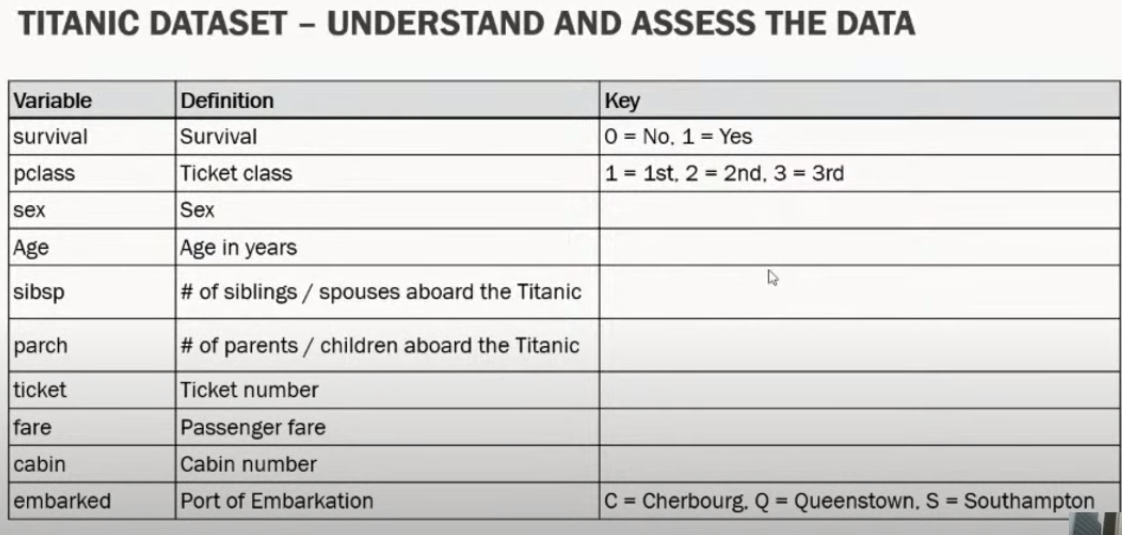


In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import random
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)

In [ ]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
train.head()
train.shape
test.head()
test.shape

In [ ]:
train.info()

In [ ]:
train.isnull().sum()

In [ ]:
((train.Age.isnull().sum())/train.shape[0])*100
((train.Cabin.isnull().sum())/train.shape[0])*100
((train.Embarked.isnull().sum())/train.shape[0])*100

In [ ]:
train.describe(include='all')

In [ ]:
#Categorical Features

train['Sex'].value_counts()

In [ ]:
train['Ticket'].value_counts()

In [ ]:
train['Embarked'].value_counts()

In [ ]:
train['Cabin'].value_counts()

In [ ]:
# Removing unimportant fields since we'll be predicting survivality

train.drop(['Name','Ticket','PassengerId'],inplace=True,axis=1)
train.head()

In [ ]:
train.shape

### Data Cleaning
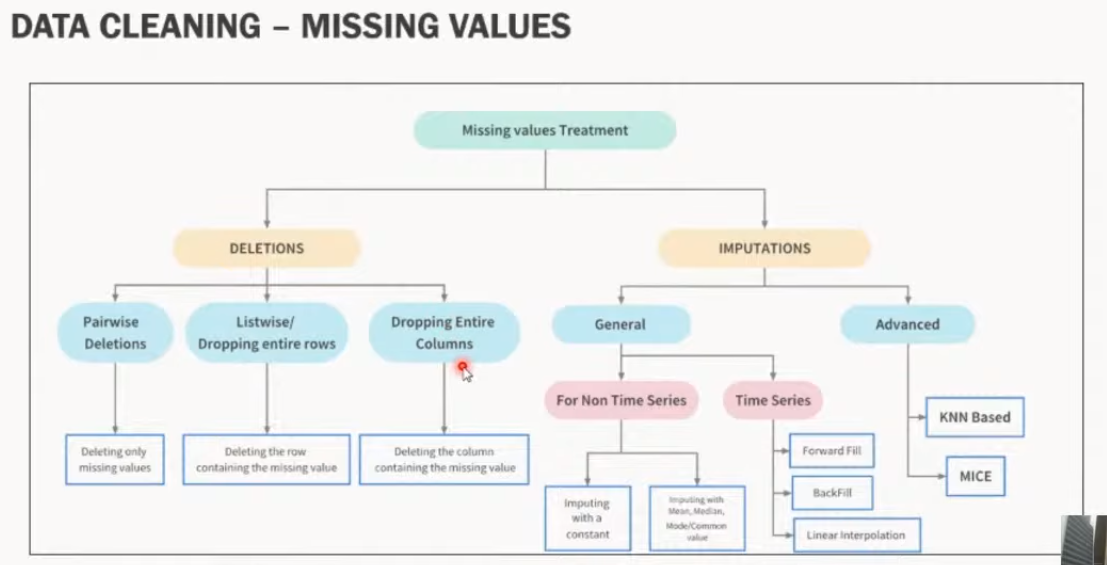

#### Missing Values

In [ ]:
plt.hist(train['Age'],bins=20)

In [ ]:
train.Age.std()

In [ ]:
train.isnull().sum()

In [ ]:
from sklearn.impute import SimpleImputer
#Numerical Values
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
mean_imputer = mean_imputer.fit(train[['Age']])
train['Age'] = mean_imputer.transform(train[['Age']]).ravel()
#Categorical Values
mode_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
mode_imputer = mode_imputer.fit(train[['Embarked']])
train['Embarked'] = mode_imputer.transform(train[['Embarked']]).ravel()

In [ ]:
plt.hist(train['Age'],bins=20)

In [ ]:
train.Age.std()

In [ ]:
train.isnull().sum()

#### Outliers

Some techniques include:
- Isolation Forest
- Minimum Covariance Determinant
- Local Outlier Factor
- One-Class SVM
- DBScan Clustering

In [ ]:
#Age 
age_mean = train.Age.mean()
age_mean
age_std = train.Age.std()
age_std
age_3std_low = -3*age_std
ll = age_mean + age_3std_low
ll
age_3std_high = 3*age_std
hl = age_mean + age_3std_high
hl

In [ ]:
filt_outliers_train = train[(train['Age'] < ll) & (train['Age'] > hl)]
filt_outliers_train

In [ ]:
#Fare
Fare_mean = train['Fare'].mean()
Fare_std = train['Fare'].std()
Fare_3std_low = -3*Fare_std
ll = Fare_mean + Fare_3std_low
Fare_3std_high = 3*Fare_std
hl = Fare_mean + Fare_3std_high
Fare_mean
Fare_std
ll
hl

In [ ]:
filt_outliers_train = train[(train['Fare'] < ll) & (train['Fare'] > hl)]
filt_outliers_train

In [ ]:
#IQR Method
def out_iqr(s, k=1.5, return_thresholds = False):
    #Calculating IQR 
    q25, q75 = np.percentile(s,25),np.percentile(s,75)
    iqr = q75 - q25
    #Calculating IQR cutoff
    cut_off = iqr*k
    lower, upper = q25 - cut_off, q75 + cut_off
    print(lower, upper)
    if return_thresholds:
        return lower, upper
    else:
        return [True if x < lower or x > upper else False for x in s]

In [ ]:
train['outlier_Age'] = out_iqr(train['Age'])
train[train['outlier_Age'] == True].shape
sns.boxplot(y = 'Age', data = train, whis = 1.5)

In [ ]:
train['outlier_Fare'] = out_iqr(train['Fare'])
train[train['outlier_Fare'] == True].shape
sns.boxplot(y = 'Fare', data = train, whis = 1.5)

In [ ]:
#Pclass vs Fare
sns.boxplot(x = 'Pclass', y = 'Fare', data = train, whis = 1.5)

In [ ]:
#Binning - Equal with binning
age_range = train.Age.max() - train.Age.min()
min_value = int(np.floor(train.Age.min()))
max_value = int(np.ceil(train.Age.max()))
#Rounding the bin width
inter_value = int(np.round(age_range/10))
min_value, max_value, inter_value

# Imbalanced Class
Different Dataset

Solutions:
* 1. Resampling Techniques
    - a. Oversamling Minority Class
    - b. Undersampling Majority Class
* 2. Generate Synthetic Samples 
    - a. SMOT
        - i. Nearest neighbor algorithm

In [ ]:
df = pd.read_csv("../input/fraud-dataset-chanukyapatnaik/fraud_data.csv")

In [ ]:
df.shape
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.isFraud.value_counts()
df.isFraud.value_counts(normalize=True)*100
sns.countplot(df.isFraud)

In [ ]:
df.isnull().sum() / len(df) * 100

In [ ]:
cat_cols = df.select_dtypes(include='object').columns

In [ ]:
# One hot encoding
df.shape
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
df = pd.get_dummies(df, columns = cat_cols)
df.shape

In [ ]:
df.head()

In [ ]:
#Transformation
X = df.drop(columns = ['isFraud'])
y = df.isFraud

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)
scaled_features.columns = X.columns

scaled_features.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

### Resampling minority class

In [ ]:
# Resampling. Since there is an imbalace of target labels
from sklearn.utils import resample
train_data = pd.concat([X_train, y_train], axis=1)

not_fraud = train_data[train_data.isFraud == 0]
fraud = train_data[train_data.isFraud == 1]

In [ ]:
train_data.shape

In [ ]:
fraud_unsampled = resample(fraud,
                            replace = True,
                            n_samples = len(not_fraud),
                            random_state = 27)

In [ ]:
unsampled = pd.concat([not_fraud, fraud_unsampled])

In [ ]:
unsampled.isFraud.value_counts()

### Undersampling majority class

In [ ]:
not_fraud_downsampled = resample(not_fraud,
                                replace = False,
                                n_samples = len(fraud),
                                random_state = 27)

In [ ]:
downsampled = pd.concat([not_fraud_downsampled, fraud])

In [ ]:
downsampled.isFraud.value_counts()

### SMOTE (Synthetic Monority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 25, sampling_strategy = 1.0)

In [ ]:
X_train, y_train = sm.fit_sample(X_train, y_train)

In [ ]:
y_train.value_counts()